In [2]:
import numpy as np
from scipy.linalg import eigh
from functools import reduce
import matplotlib.pyplot as plt

In [3]:
# 系统参数
N = 4  # qubit数
J = 1.0  # 自旋耦合强度
h = 1.0  # 横场强度


In [4]:
# 定义泡利矩阵
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])

In [5]:
# 构造N体泡利矩阵的张量积
def kron_N(pauli_list):
    return reduce(np.kron, pauli_list)

In [6]:
# 构造Hamiltonian矩阵
def build_hamiltonian(N, J, h):
    H = np.zeros((2**N, 2**N))
    # 最近邻Z_i Z_{i+1}项
    for i in range(N - 1):
        ops = [I] * N
        ops[i] = Z
        ops[i + 1] = Z
        H -= J * kron_N(ops)
    # 横场X_i项
    for i in range(N):
        ops = [I] * N
        ops[i] = X
        H -= h * kron_N(ops)
    return H

In [7]:
# 构造总磁化算符
def build_total_op(N, op):
    total = np.zeros((2**N, 2**N))
    for i in range(N):
        ops = [I] * N
        ops[i] = op
        total += kron_N(ops)
    return total

In [8]:
# 构建Hamiltonian
H = build_hamiltonian(N, J, h)

In [9]:
# 对角化
eigvals, eigvecs = eigh(H)
E0 = eigvals[0]
ground_state = eigvecs[:, 0]

In [10]:
# 构建总磁化算符
Z_total = build_total_op(N, Z)
X_total = build_total_op(N, X)

In [11]:
# 计算期望值
mz = np.vdot(ground_state, Z_total @ ground_state).real / N
mx = np.vdot(ground_state, X_total @ ground_state).real / N

# 输出结果
print(f"Exact Diagonalization Results for N={N}")
print(f"Ground state energy E0: {E0:.6f}")
print(f"<Z> per site: {mz:.6f}")
print(f"<X> per site: {mx:.6f}")

Exact Diagonalization Results for N=4
Ground state energy E0: -4.758770
<Z> per site: -0.000000
<X> per site: 0.810095


In [14]:
# 单独展示 h=1 时不同 N 下的 <X>、E0、<Z>
print("h=1 时，不同 N 下的 <X>、E0、<Z> 值：")
for N in Ns:
    H = build_hamiltonian(N, J=1.0, h=1.0)
    eigvals, eigvecs = eigh(H)
    ground_state = eigvecs[:, 0]
    # <X>
    mx = magnetization_x(ground_state, N, X, kron_N, I)
    # <Z>
    def magnetization_z(ground_state, N, Z, kron_N, I):
        M = 0.0
        for i in range(N):
            ops = [I] * N
            ops[i] = Z
            op = kron_N(ops)
            M += np.vdot(ground_state, op @ ground_state).real
        return M / N
    mz = magnetization_z(ground_state, N, Z, kron_N, I)
    E0 = eigvals[0]
    print(f"N={N}, E0={E0:.6f}, <Z>={mz:.6f}, <X>={mx:.6f}")

h=1 时，不同 N 下的 <X>、E0、<Z> 值：
N=2, E0=-2.236068, <Z>=0.000000, <X>=0.894427
N=3, E0=-3.493959, <Z>=-0.000000, <X>=0.842363
N=4, E0=-4.758770, <Z>=-0.000000, <X>=0.810095
N=5, E0=-6.026674, <Z>=0.000000, <X>=0.787732
N=6, E0=-7.296230, <Z>=-0.000000, <X>=0.771145
N=7, E0=-8.566772, <Z>=-0.000000, <X>=0.758264
N=8, E0=-9.837951, <Z>=0.000000, <X>=0.747924
N=9, E0=-11.109566, <Z>=0.000000, <X>=0.739408
N=10, E0=-12.381490, <Z>=-0.000000, <X>=0.732255
N=10, E0=-12.381490, <Z>=-0.000000, <X>=0.732255


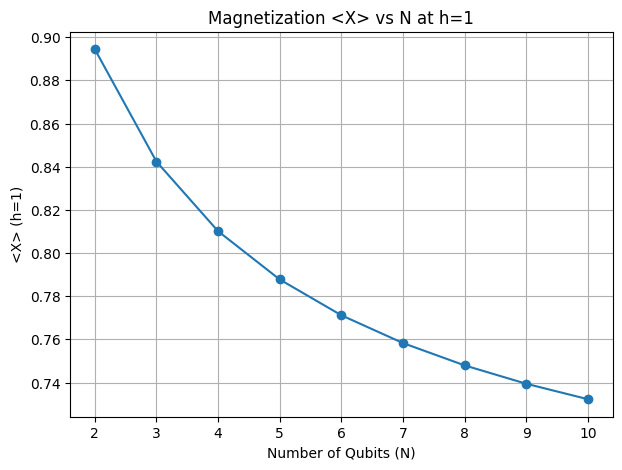

In [15]:
# 画出不同 N 下的 <X> 的变化
Ns = range(2, 11, 1)
mxs = []
for N in Ns:
    H = build_hamiltonian(N, J=1.0, h=1.0)
    eigvals, eigvecs = eigh(H)
    ground_state = eigvecs[:, 0]
    mx = magnetization_x(ground_state, N, X, kron_N, I)
    mxs.append(mx)
plt.figure(figsize=(7,5))
plt.plot(Ns, mxs, marker='o')
plt.xlabel('Number of Qubits (N)')
plt.ylabel('<X> (h=1)')
plt.title('Magnetization <X> vs N at h=1')
plt.grid()
plt.show()